# querying the data lake in a jupyter notebook

## prerequisites

make sure you have `pip install presto-python-client` and `pandas` and `matplotlib` installed.
you may do that via `pip install <name from above>`

In [1]:
import prestodb

In [2]:
conn = prestodb.dbapi.connect(
    host='presto.apps.eu.idealo.com',
    port=80, user='false',
    catalog='hive',
    schema='default')

## creating a cursor object instance

In [3]:
# create the cursor
cur = conn.cursor()
# cursor objects functions and attributes
[thing for thing in dir(cur) if '_' not in thing]

['arraysize',
 'cancel',
 'close',
 'connection',
 'description',
 'execute',
 'executemany',
 'fetchall',
 'fetchmany',
 'fetchone',
 'genall',
 'rowcount',
 'setinputsizes',
 'setoutputsize',
 'stats']

## exploring the schemas and tables

In [4]:
#schema either in double quotes or without quotes!
cur.execute('''
SHOW TABLES from "dl_dwh_prod"
''')
records = cur.fetchall()
list(records)

[['agg_cookie_email_mapping'],
 ['agg_cookie_email_mapping_daily'],
 ['compare_isg'],
 ['fact_all_earnings'],
 ['fact_cpc_earnings'],
 ['fact_cpo_earnings'],
 ['fact_dk_earnings'],
 ['fact_leadins'],
 ['fact_leadouts'],
 ['isg'],
 ['main_sessions'],
 ['main_traces'],
 ['sso_registration'],
 ['sso_verification'],
 ['traces']]

## creating a cursor and querying

query can be highlighted in markdown code blocks (between triple backtics \`\`\`) for better readability
```sql
SELECT * 
FROM "dl_dwh_prod"."so_facts"
WHERE random(1000) = 1
limit 1000
```

## storing the results in a dataframe

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("./Elektroartikel_sub_category.csv")

In [3]:
df.shape

(43782379, 7)

In [4]:
df.head(5)

,year_month,hour,leadout_price,leadout_click_position,sub_category_name,device_type,leadout_count
0,1,0,720.26,9.0,Telekommunikation,Desktop,1
1,1,20,195.32,6.0,Computer,Desktop,1
2,7,4,1746.15,3.0,Haushaltselektronik,Unknown,1
3,2,8,1199.00,3.0,Computer,Phone,4
4,6,20,39.99,7.0,Telekommunikation,Phone,1


In [5]:

a=df.groupby('sub_category_name')['leadout_count','leadout_click_position'].mean()

<ipython-input-5-b299a43ef141>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df.groupby('sub_category_name')['leadout_count','leadout_click_position'].mean()


In [6]:
a['sub_category_name'] = a.index
a.columns = ['avg_leadout_count', 'avg_position','sub_category_name']
a

,avg_leadout_count,avg_position,sub_category_name
sub_category_name,,,
Bartschneider & Haarschneider,1.133151,3.267179,Bartschneider & Haarschneider
Computer,1.458416,4.202858,Computer
Drucker & Scanner,1.137135,4.313228,Drucker & Scanner
Elektrische Zahnbürste,1.095069,3.168103,Elektrische Zahnbürste
Fotografie,1.229208,4.192216,Fotografie
Gaming- & Elektrospielzeug,1.126738,4.375217,Gaming- & Elektrospielzeug
Haushaltselektronik,1.532999,3.949052,Haushaltselektronik
HiFi & Audio,1.484361,3.907287,HiFi & Audio
Medien,1.400917,2.685315,Medien


array([[<AxesSubplot:title={'center':'leadout_price'}>]], dtype=object)

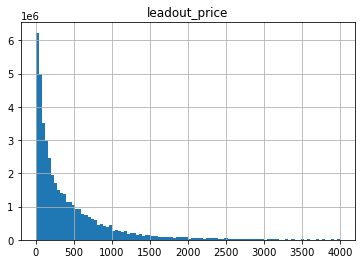

In [83]:
df.hist(column='leadout_price', range=[0,4000],bins=100)


array([[<AxesSubplot:title={'center':'leadout_click_position'}>]],
      dtype=object)

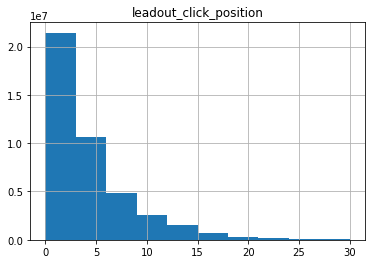

In [85]:
df.hist(column='leadout_click_position', range=[0,30],bins=10)

array([[<AxesSubplot:title={'center':'final_pos'}>]], dtype=object)

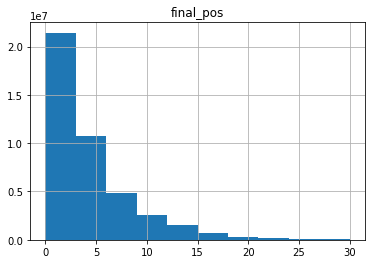

In [116]:
df.hist(column='final_pos', range=[0,30],bins=10)

array([[<AxesSubplot:title={'center':'hour'}>]], dtype=object)

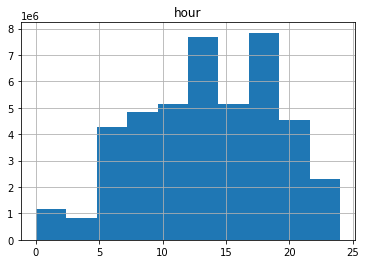

In [87]:
df.hist(column='hour', range=[0,24],bins=10)

array([[<AxesSubplot:title={'center':'year_month'}>]], dtype=object)

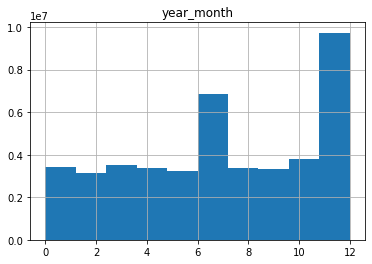

In [91]:
df.hist(column='year_month', range=[0,12],bins=10)

In [7]:
df.groupby(['device_type']).count()

,year_month,hour,leadout_price,leadout_click_position,sub_category_name,leadout_count
device_type,,,,,,
Anonymized,59520,59520,59520,59432,59520,59520
Desktop,25871323,25871323,25871323,25821376,25871323,25871323
Game Console,3805,3805,3805,3803,3805,3805
Hacker,442,442,442,428,442,442
Mobile,10876,10876,10876,10783,10876,10876
Phone,13973993,13973993,13973993,13933404,13973993,13973993
Robot,5105,5105,5105,4829,5105,5105
Robot Mobile,2918,2918,2918,2910,2918,2918
Set-top box,68,68,68,68,68,68


In [114]:
df.isnull().sum(axis = 0)

year_month                     0
hour                           0
leadout_price                  0
leadout_click_position    109023
sub_category_name              0
device_type                    0
leadout_count                  0
final_pos                      0
avg_leadout_count              0
avg_position                   0
dtype: int64

In [8]:
df = pd.merge(df, a[['avg_leadout_count','avg_position']], on='sub_category_name', how='inner')

In [9]:
import numpy as np
df['final_pos'] = np.NaN
df['final_pos'] = df['leadout_click_position'].fillna(df['leadout_click_position']).fillna(df['avg_position'])


In [10]:
df_1=df[(df['leadout_price']<=200) & (df['leadout_click_position']<6)]

array([[<AxesSubplot:title={'center':'leadout_price'}>]], dtype=object)

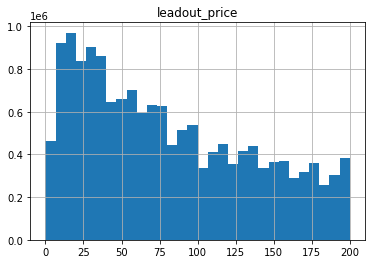

In [16]:
df_1.hist(column='leadout_price', range=[0,200],bins=30)

In [21]:
df_1.head(2)

,year_month,hour,leadout_price,leadout_click_position,sub_category_name,device_type,leadout_count,avg_leadout_count,avg_position,final_pos
2,12,16,199.00,4.0,Telekommunikation,Phone,13,1.431033,4.385766,4.0
6,9,7,108.97,1.0,Telekommunikation,Desktop,1,1.431033,4.385766,1.0


array([[<AxesSubplot:title={'center':'leadout_click_position'}>]],
      dtype=object)

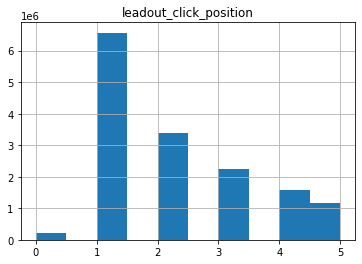

In [20]:
df_1.hist(column='leadout_click_position', range=[0,5],bins=10)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
df_1.corr()

,year_month,hour,leadout_price,leadout_click_position,leadout_count,avg_leadout_count,avg_position,final_pos
year_month,1.000000,0.000915,0.033219,0.007208,-0.013423,0.041305,-0.015262,0.007208
hour,0.000915,1.000000,-0.001150,0.002705,0.016688,0.010444,-0.020276,0.002705
leadout_price,0.033219,-0.001150,1.000000,0.023691,0.035778,0.099510,0.066540,0.023691
leadout_click_position,0.007208,0.002705,0.023691,1.000000,-0.032475,-0.011164,0.019159,1.000000
leadout_count,-0.013423,0.016688,0.035778,-0.032475,1.000000,0.085472,-0.000550,-0.032475
avg_leadout_count,0.041305,0.010444,0.099510,-0.011164,0.085472,1.000000,-0.041883,-0.011164
avg_position,-0.015262,-0.020276,0.066540,0.019159,-0.000550,-0.041883,1.000000,0.019159
final_pos,0.007208,0.002705,0.023691,1.000000,-0.032475,-0.011164,0.019159,1.000000


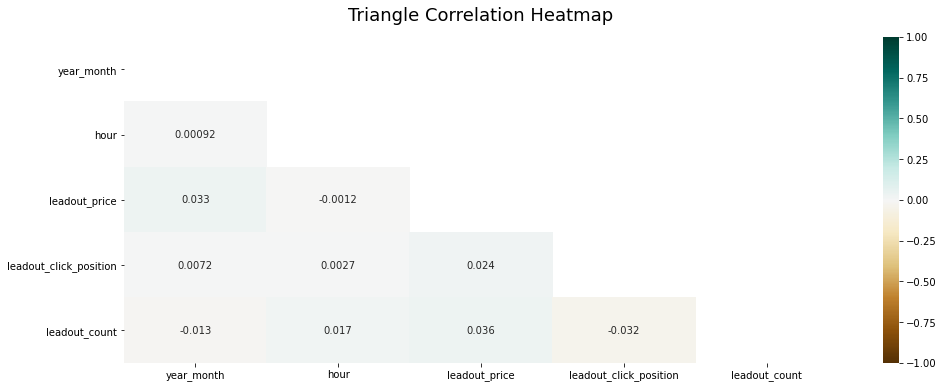

In [24]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_1[df_1.columns[~df_1.columns.isin(['final_pos','avg_leadout_count','avg_position'])]].corr(), dtype=np.bool))
heatmap = sns.heatmap(df_1[df_1.columns[~df_1.columns.isin(['final_pos','avg_leadout_count','avg_position'])]].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

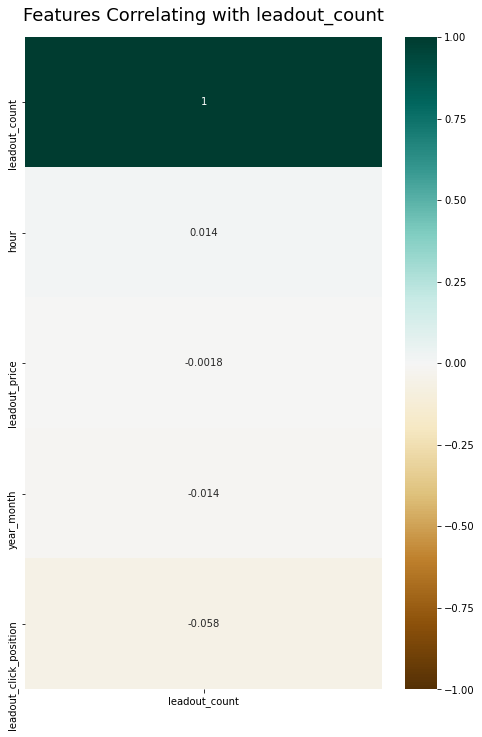

In [147]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df[df.columns[~df.columns.isin(['final_pos','avg_leadout_count','avg_position'])]].corr()[['leadout_count']].sort_values(by='leadout_count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with leadout_count', fontdict={'fontsize':18}, pad=16);

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [149]:
features=df[df.columns[~df.columns.isin(['leadout_click_position','avg_leadout_count','avg_position'])]]
features = pd.get_dummies(features)

In [155]:
features

array([[  1.  ,   0.  , 720.26, ...,   0.  ,   0.  ,   0.  ],
       [  6.  ,  20.  ,  39.99, ...,   0.  ,   0.  ,   0.  ],
       [ 12.  ,  16.  , 199.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  2.  ,  21.  , 144.5 , ...,   0.  ,   0.  ,   0.  ],
       [ 11.  ,  10.  , 243.9 , ...,   0.  ,   0.  ,   0.  ],
       [ 11.  ,  11.  ,  36.49, ...,   0.  ,   0.  ,   0.  ]])

In [150]:
# Labels are the values we want to predict
labels = np.array(features['leadout_count'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('leadout_count', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [151]:

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)


In [159]:
test_labels

array([1, 1, 2, ..., 1, 1, 1])

In [152]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (35025903, 28)
Training Labels Shape: (35025903,)
Testing Features Shape: (8756476, 28)
Testing Labels Shape: (8756476,)


In [158]:
feature_list

['year_month',
 'hour',
 'leadout_price',
 'final_pos',
 'sub_category_name_Bartschneider & Haarschneider',
 'sub_category_name_Computer',
 'sub_category_name_Drucker & Scanner',
 'sub_category_name_Elektrische Zahnbürste',
 'sub_category_name_Fotografie',
 'sub_category_name_Gaming- & Elektrospielzeug',
 'sub_category_name_Haushaltselektronik',
 'sub_category_name_HiFi & Audio',
 'sub_category_name_Medien',
 'sub_category_name_TV & Sat',
 'sub_category_name_Telekommunikation',
 'device_type_Anonymized',
 'device_type_Desktop',
 'device_type_Game Console',
 'device_type_Hacker',
 'device_type_Mobile',
 'device_type_Phone',
 'device_type_Robot',
 'device_type_Robot Mobile',
 'device_type_Set-top box',
 'device_type_TV',
 'device_type_Tablet',
 'device_type_Unknown',
 'device_type_Virtual Reality']

In [161]:
# The baseline predictions are the historical averages
baseline_preds = test_labels.mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.74


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];